# Data Extraction and NLP(Test Assignment)

### <U>WEB-SCRAPPING USING BEAUTIFUL SOUP<U>
    

In [25]:
import os
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup

# Read the Excel file
df = pd.read_excel("C:\\Users\\Vanditha Dsouza\\Input.xlsx")

# Define the folder path to save the articles
folder_path = 'C:\\Users\\Vanditha Dsouza\\articles'

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the specific pattern to search within the div class
specific_pattern = r'td-post-content tagdiv-type'

# Define a function to scrape the article content from a URL
def scrape_article(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'lxml')

        # Find the title of the article
        title_element = soup.find('title')
        title = title_element.text.strip() if title_element else ''

        # Find all div elements with the specific pattern in class attribute
        div_elements = soup.find_all('div', class_=re.compile(specific_pattern))

        for div_element in div_elements:
            # Find all paragraph elements within the div
            paragraphs = div_element.find_all('p')

            # Extract the text from the paragraph elements and convert to lowercase
            text = ' '.join(paragraph.get_text().lower() for paragraph in paragraphs)

            return title, text.strip()  # Strip leading/trailing whitespace
    return '', ''

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    url_id = row['URL_ID']
    url = row['URL']
    title, article_text = scrape_article(url)
    file_path = os.path.join(folder_path, f'{url_id}.txt')
    
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write(f'Title: {title}\n\n')
        file.write(article_text)

    # Add the file path to the DataFrame
    df.at[index, 'Path'] = file_path

    print(f"Article from URL_ID {url_id} saved as {file_path}")


Article from URL_ID 37.0 saved as C:\Users\Vanditha Dsouza\articles\37.0.txt
Article from URL_ID 38.0 saved as C:\Users\Vanditha Dsouza\articles\38.0.txt
Article from URL_ID 39.0 saved as C:\Users\Vanditha Dsouza\articles\39.0.txt
Article from URL_ID 40.0 saved as C:\Users\Vanditha Dsouza\articles\40.0.txt
Article from URL_ID 41.0 saved as C:\Users\Vanditha Dsouza\articles\41.0.txt
Article from URL_ID 42.0 saved as C:\Users\Vanditha Dsouza\articles\42.0.txt
Article from URL_ID 43.0 saved as C:\Users\Vanditha Dsouza\articles\43.0.txt
Article from URL_ID 44.0 saved as C:\Users\Vanditha Dsouza\articles\44.0.txt
Article from URL_ID 45.0 saved as C:\Users\Vanditha Dsouza\articles\45.0.txt
Article from URL_ID 46.0 saved as C:\Users\Vanditha Dsouza\articles\46.0.txt
Article from URL_ID 47.0 saved as C:\Users\Vanditha Dsouza\articles\47.0.txt
Article from URL_ID 48.0 saved as C:\Users\Vanditha Dsouza\articles\48.0.txt
Article from URL_ID 49.0 saved as C:\Users\Vanditha Dsouza\articles\49.0.txt

Article from URL_ID 143.0 saved as C:\Users\Vanditha Dsouza\articles\143.0.txt
Article from URL_ID 144.0 saved as C:\Users\Vanditha Dsouza\articles\144.0.txt
Article from URL_ID 145.0 saved as C:\Users\Vanditha Dsouza\articles\145.0.txt
Article from URL_ID 146.0 saved as C:\Users\Vanditha Dsouza\articles\146.0.txt
Article from URL_ID 147.0 saved as C:\Users\Vanditha Dsouza\articles\147.0.txt
Article from URL_ID 148.0 saved as C:\Users\Vanditha Dsouza\articles\148.0.txt
Article from URL_ID 149.0 saved as C:\Users\Vanditha Dsouza\articles\149.0.txt
Article from URL_ID 150.0 saved as C:\Users\Vanditha Dsouza\articles\150.0.txt


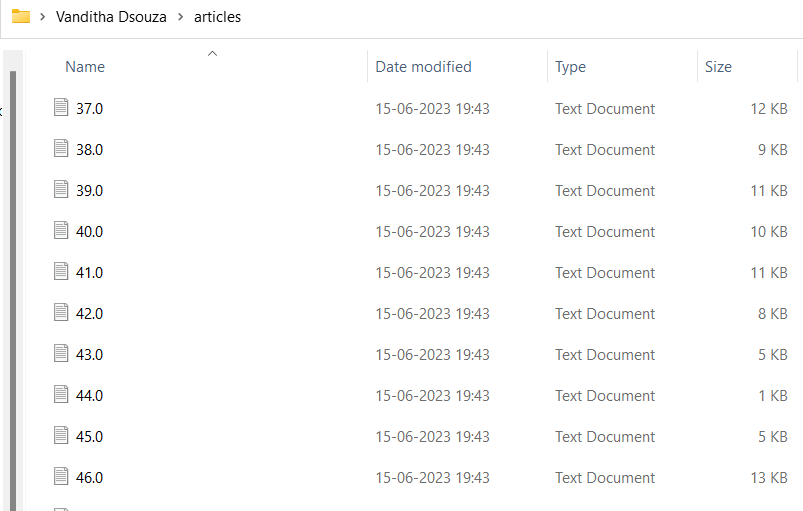

In [28]:
df.head(10)

,URL_ID,URL,Path,contents
0,37.0,https://insights.blackcoffer.com/ai-in-healthc...,C:\Users\Vanditha Dsouza\articles\37.0.txt,
1,38.0,https://insights.blackcoffer.com/what-if-the-c...,C:\Users\Vanditha Dsouza\articles\38.0.txt,
2,39.0,https://insights.blackcoffer.com/what-jobs-wil...,C:\Users\Vanditha Dsouza\articles\39.0.txt,
3,40.0,https://insights.blackcoffer.com/will-machine-...,C:\Users\Vanditha Dsouza\articles\40.0.txt,
4,41.0,https://insights.blackcoffer.com/will-ai-repla...,C:\Users\Vanditha Dsouza\articles\41.0.txt,
5,42.0,https://insights.blackcoffer.com/man-and-machi...,C:\Users\Vanditha Dsouza\articles\42.0.txt,
6,43.0,https://insights.blackcoffer.com/in-future-or-...,C:\Users\Vanditha Dsouza\articles\43.0.txt,
7,44.0,https://insights.blackcoffer.com/how-neural-ne...,C:\Users\Vanditha Dsouza\articles\44.0.txt,
8,45.0,https://insights.blackcoffer.com/how-machine-l...,C:\Users\Vanditha Dsouza\articles\45.0.txt,
9,46.0,https://insights.blackcoffer.com/deep-learning...,C:\Users\Vanditha Dsouza\articles\46.0.txt,


### <u>TEXT ANALYSIS USING NLP

#### IMPORTING MODULES

In [29]:

import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
nltk.download("all")
#import pyphen


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Vanditha
[nltk_data]    |     Dsouza\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Vanditha
[nltk_data]    |     Dsouza\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Vanditha
[nltk_data]    |     Dsouza\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Vanditha
[nltk_data]    |     Dsouza\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to


True

#### TEXT PREPROCESSING

In [31]:
 extra_stopword=[]
with open("C:\\Users\\Vanditha Dsouza\\StopWords_Names.txt", 'r') as file:
    extra_stopword = [line.strip() for line in file.readlines()]
with open("C:\\Users\\Vanditha Dsouza\\StopWords_Geographic.txt", 'r') as file:
    extra_stopword = extra_stopword+[line.strip() for line in file.readlines()]
with open("C:\\Users\\Vanditha Dsouza\\StopWords_GenericLong.txt", 'r') as file:
    extra_stopword = extra_stopword+[line.strip() for line in file.readlines()]
with open("C:\\Users\\Vanditha Dsouza\\StopWords_Generic.txt", 'r') as file:
    extra_stopword = extra_stopword+[line.strip() for line in file.readlines()]
with open("C:\\Users\\Vanditha Dsouza\\StopWords_DatesandNumbers.txt", 'r') as file:
    extra_stopword = extra_stopword+[line.strip() for line in file.readlines()]
with open("C:\\Users\\Vanditha Dsouza\\StopWords_Auditor.txt", 'r') as file:
    extra_stopword = extra_stopword+[line.strip() for line in file.readlines()]
with open("C:\\Users\\Vanditha Dsouza\\StopWords_Currencies.txt", 'r') as file:
    for line in file:
        word = line.strip().split('|')[0].strip()
        extra_stopword.extend(word)
extra_stopword = [word.lower() for word in extra_stopword]
extra_stopword[0] = extra_stopword[0].replace('  | Surnames from 1990 census > .002%.  www.census.gov.genealogy/names/dist.all.last', '')
#stop_words=stopwords.words('english')+extra_stopword
df["contents"]=""
personal_pronouns = ['i', 'we', 'my', 'ours', 'us']

def remove_numbers(text):
    pattern=r'[^A-z\s]'
    return re.sub(pattern, '',text).lower()
for index, row in df.iterrows():
    file_path = row['Path']
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the contents
    tokens = word_tokenize(text)
    sentences = sent_tokenize(text)
    # Remove stopwords
    filtered_tokens = [remove_numbers(token) for token in tokens if token.lower() not in extra_stopword and token.isalpha()]
    
    
    #lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    
    # Update the DataFrame with filtered tokens
    df.at[index,'contents'] = filtered_tokens
    df.at[index, 'Num_Sentences'] = len(sentences)
    

#### FINDING VARIABLES

In [33]:
with open("C:\\Users\\Vanditha Dsouza\\positive-words.txt", 'r') as file:
    pos= [line.strip() for line in file.readlines()]
pos= [word.lower() for word in pos]
with open("C:\\Users\\Vanditha Dsouza\\negative-words.txt", 'r') as file:
    neg= [line.strip() for line in file.readlines()]
neg= [word.lower() for word in neg]
'''
dic = pyphen.Pyphen(lang='en')

Define a function to count the number of syllables in a word
def count_syllables(word):
    return len(dic.inserted(word).split('-'))
    we can use this pre-defined module to count syllables but 
    since you have asked to define our own function we are using the following
'''

def count_syllables(word):
    # Handling exceptions for words ending with "es" or "ed"
    word = re.sub(r'ed$', '', word)
    word = re.sub(r'es$', '', word)
    # Counting the number of vowels in the word
    vowels = re.findall(r'[aeiou]+', word, re.I)
    return len(vowels)
df['SYLLABLE PER WORD']=""
for index, row in df.iterrows():
    filtered_tokens = row['contents']

    # Calculate the positive score
    positive_score = sum((1 for token in filtered_tokens if token in pos))
    df.at[index, 'POSITIVE SCORE'] = positive_score

    # Calculate the negative score
    negative_score = sum((-1 for token in filtered_tokens if token in neg))*-1
    df.at[index, 'NEGATIVE SCORE'] = negative_score

    # Calculate the polarity score
    polarity_score = (positive_score - negative_score) / ((positive_score + negative_score) + 0.000001)
    df.at[index, 'POLARITY SCORE'] = polarity_score
    
    
    #Calulate the Subjectivity score
    Subjectivity_Score = (positive_score + negative_score)/ ((len(filtered_tokens)) + 0.000001)
    df.at[index, 'SUBJECTIVITY SCORE'] = Subjectivity_Score
    
     # Calculate the average sentence length
    average_sentence_length = len(filtered_tokens)/row['Num_Sentences']
    df.at[index, 'AVG SENTENCE LENGTH'] = average_sentence_length
    
    # Count the number of complex words
    complex_word_count = sum(1 for token in filtered_tokens if count_syllables(token) > 2)
    Percentage_of_Complex_words=(complex_word_count/len(filtered_tokens))
    
    df.at[index, 'PERCENTAGE OF COMPLEX WORDS']=Percentage_of_Complex_words
    #computing FOG index
    Fog_Index = 0.4 * (average_sentence_length + Percentage_of_Complex_words)
    df.at[index, 'FOG INDEX'] =Fog_Index
    
    
    df.at[index, 'COMPLEX WORD COUNT'] = complex_word_count

    #Word_count after cleaning
    df.at[index, 'WORD COUNT'] = len(filtered_tokens)
    
    #Syllable Count Per Word
    syllable_count_per_word = [count_syllables(word) for word in filtered_tokens]
    avg_syllable_count_per_word = sum([count_syllables(word) for word in filtered_tokens])/len(filtered_tokens)
    df.at[index, 'SYLLABLE PER WORD'] = syllable_count_per_word

    file_path = str(row['Path'])
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenize the contents
    tokens = word_tokenize(text)

    # Filter and preprocess the tokens
    filtered_tokens = [remove_numbers(token) for token in tokens if token.lower() not in extra_stopword and token.isalpha()]

    # Calculate the personal pronoun count
    personal_pronoun_count = sum([text.lower().count(word) for word in personal_pronouns])

    # Update the DataFrame with the personal pronoun count
    df.at[index, 'PERSONAL PRONOUNS'] = personal_pronoun_count

    # Calculate the total number of words
    total_word_count = len(filtered_tokens)

    # Calculate the sum of the total number of characters in each word
    total_char_count = sum([len(word) for word in filtered_tokens])

    # Calculate the average word length
    avg_word_length = total_char_count / total_word_count

    # Update the DataFrame with the average word length
    df.at[index, 'AVG WORD LENGTH'] = avg_word_length
    df.at[index, 'AVG SYLLABLE PER WORD'] = avg_syllable_count_per_word

In [34]:
df=df.drop(["Path","contents","Num_Sentences"],axis=1)

In [35]:
df

,URL_ID,URL,SYLLABLE PER WORD,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,COMPLEX WORD COUNT,WORD COUNT,PERSONAL PRONOUNS,AVG WORD LENGTH,AVG SYLLABLE PER WORD
0,37.0,https://insights.blackcoffer.com/ai-in-healthc...,"[2, 3, 3, 2, 2, 3, 2, 4, 1, 2, 2, 1, 3, 2, 1, ...",64.0,32.0,0.333333,0.104575,12.240000,0.443355,5.073342,407.0,918.0,929.0,7.623094,2.444444
1,38.0,https://insights.blackcoffer.com/what-if-the-c...,"[2, 2, 2, 2, 3, 2, 2, 1, 4, 2, 3, 3, 3, 2, 1, ...",58.0,37.0,0.221053,0.177570,6.772152,0.340187,2.844936,182.0,535.0,602.0,7.162617,2.265421
2,39.0,https://insights.blackcoffer.com/what-jobs-wil...,"[2, 1, 2, 2, 3, 3, 2, 4, 2, 3, 3, 2, 2, 3, 3, ...",64.0,35.0,0.292929,0.122829,9.482353,0.472705,3.982023,381.0,806.0,871.0,7.705955,2.528536
3,40.0,https://insights.blackcoffer.com/will-machine-...,"[2, 3, 3, 2, 3, 1, 3, 2, 2, 2, 5, 1, 4, 5, 3, ...",59.0,27.0,0.372093,0.146758,6.369565,0.370307,2.695949,217.0,586.0,665.0,7.182594,2.358362
4,41.0,https://insights.blackcoffer.com/will-ai-repla...,"[2, 3, 1, 3, 2, 3, 5, 3, 3, 2, 2, 1, 1, 4, 5, ...",54.0,23.0,0.402597,0.110315,9.064935,0.389685,3.781848,272.0,698.0,742.0,7.340974,2.385387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,146.0,https://insights.blackcoffer.com/blockchain-fo...,"[2, 2, 2, 3, 2, 4, 3, 3, 1, 4, 2, 1, 4, 1, 2, ...",21.0,25.0,-0.086957,0.122016,7.854167,0.384615,3.295513,145.0,377.0,392.0,7.647215,2.339523
110,147.0,https://insights.blackcoffer.com/the-future-of...,"[2, 3, 3, 3, 2, 3, 3, 1, 2, 4, 3, 1, 4, 5, 3, ...",30.0,9.0,0.538462,0.081420,9.979167,0.415449,4.157846,199.0,479.0,438.0,7.350731,2.409186
111,148.0,https://insights.blackcoffer.com/big-data-anal...,"[2, 1, 2, 3, 3, 3, 2, 2, 4, 3, 2, 3, 2, 1, 3, ...",26.0,43.0,-0.246377,0.126374,8.400000,0.417582,3.527033,228.0,546.0,504.0,7.067766,2.344322
112,149.0,https://insights.blackcoffer.com/business-anal...,"[2, 3, 3, 3, 2, 3, 2, 3, 4, 3, 2, 4, 3, 3, 2, ...",27.0,3.0,0.800000,0.107143,11.200000,0.489286,4.675714,137.0,280.0,312.0,7.932143,2.510714


In [37]:
df.to_excel('Output Data Structure.xlsx', index=False, engine='openpyxl')